### Imports

In [0]:
import numpy as np

import matplotlib.pyplot as plt
from data_utils import get_CIFAR10_data
from vis_utils import visualize_grid
from two_layernet import TwoLayerNet

%matplotlib inline 

np.random.seed(0)

### Import CIFAR10

In [5]:
input_size = 32 * 32 * 3
num_classes = 10
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Visualize some images to get a feel for the data

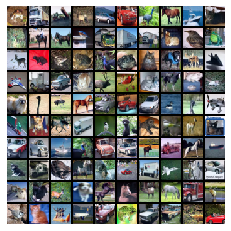

In [0]:
plt.figure(2)
plt.imshow(visualize_grid(X_train[:100, :].reshape(100, 32,32, 3), padding=3).astype('uint8'))
plt.gca().axis('off')
plt.show()

In [0]:
def plot_stats(stats):
    plt.figure(3)
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Classification accuracy')
    plt.legend()
    plt.show()

In [0]:
def compute_val_acc(net):
    val_acc = (net.predict(X_val) == y_val).mean()
    print('Validation accuracy: ', val_acc)
    return val_acc

### Hyperparameters

In [0]:
hidden_size = 50
num_iters = 1000
batch_size = 200
learning_rate = 1e-4
learning_rate_decay = 0.95
reg = 0.25


### Hidden Size tuning


In [38]:
hidden_sizes = np.arange(10, 350, 10)
hs_nets = []
hs_stats = []
hs_val_accs = []

for hidden_size in hidden_sizes:
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    hs_nets.append(net)

    stat = net.train(X_train, y_train, X_val, y_val,
                           num_iters=1000, batch_size=200,
                           learning_rate=1e-4, learning_rate_decay=0.95,
                           reg=0.25, verbose=False)

    hs_stats.append(stat)

    val_acc = compute_val_acc(net)

    hs_val_accs.append(val_acc)

Validation accuracy:  0.258
Validation accuracy:  0.276
Validation accuracy:  0.287
Validation accuracy:  0.277
Validation accuracy:  0.286
Validation accuracy:  0.285
Validation accuracy:  0.285
Validation accuracy:  0.287
Validation accuracy:  0.3
Validation accuracy:  0.289
Validation accuracy:  0.29
Validation accuracy:  0.286
Validation accuracy:  0.289
Validation accuracy:  0.294
Validation accuracy:  0.297
Validation accuracy:  0.306
Validation accuracy:  0.296
Validation accuracy:  0.304
Validation accuracy:  0.305
Validation accuracy:  0.309
Validation accuracy:  0.299
Validation accuracy:  0.305
Validation accuracy:  0.306
Validation accuracy:  0.302
Validation accuracy:  0.301
Validation accuracy:  0.315
Validation accuracy:  0.303
Validation accuracy:  0.307
Validation accuracy:  0.309
Validation accuracy:  0.312
Validation accuracy:  0.314
Validation accuracy:  0.307
Validation accuracy:  0.317
Validation accuracy:  0.312


<Figure size 432x288 with 0 Axes>

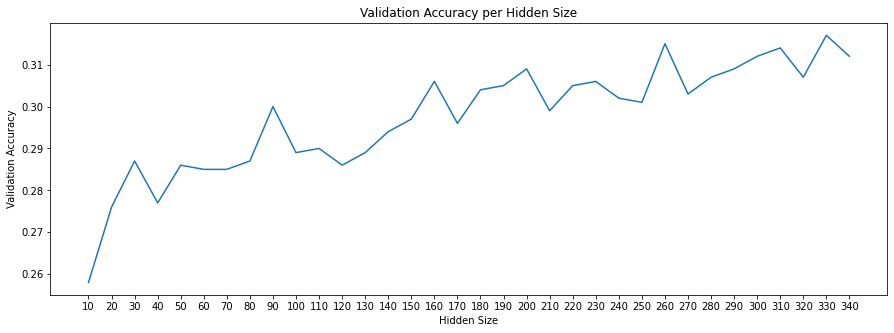

In [48]:
plt.figure(4)

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(hidden_sizes, hs_val_accs)
ax.set_xlabel('Hidden Size')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Validation Accuracy per Hidden Size')
ax.xaxis.set_ticks(hidden_sizes)

plt.draw()
plt.savefig('hs.png')
plt.show()

### Learning Rate tuning

In [18]:
learning_rates = {'1e-1': 1e-1, '1e-2': 1e-2, '0.5e-3': 0.5e-3, '0.75e-3': 0.75e-3, '1e-3': 1e-3, '2e-3': 2e-3, '3e-3': 3e-3, '1e-4': 1e-4, '1e-5': 1e-5, '1e-6': 1e-6}
lr_nets = []
lr_stats = []
lr_val_accs = []

for learning_rate in list(learning_rates.values()):
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    lr_nets.append(net)

    stat = net.train(X_train, y_train, X_val, y_val,
                           num_iters=1000, batch_size=200,
                           learning_rate=learning_rate, learning_rate_decay=0.95,
                           reg=0.25, verbose=False)

    lr_stats.append(stat)

    val_acc = compute_val_acc(net)
    lr_val_accs.append(val_acc)

/content/two_layernet.py:94: RuntimeWarning: overflow encountered in exp
  exp = np.exp(x)
/content/two_layernet.py:97: RuntimeWarning: invalid value encountered in true_divide
  output = np.divide(exp.T, sum_exp)
/content/two_layernet.py:131: RuntimeWarning: divide by zero encountered in log
  return -one_hot_y*np.log(probs)
/content/two_layernet.py:131: RuntimeWarning: invalid value encountered in multiply
  return -one_hot_y*np.log(probs)
/content/two_layernet.py:171: RuntimeWarning: invalid value encountered in less
  dJ_dz2[z2 < 0] = 0


Validation accuracy:  0.087
Validation accuracy:  0.087
Validation accuracy:  0.444
Validation accuracy:  0.454
Validation accuracy:  0.452
Validation accuracy:  0.47
Validation accuracy:  0.402
Validation accuracy:  0.279
Validation accuracy:  0.174
Validation accuracy:  0.115


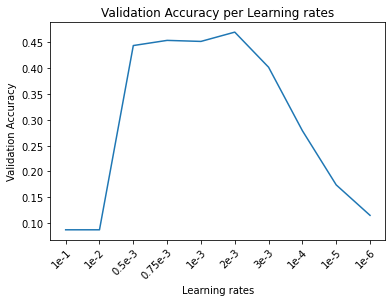

In [20]:
plt.figure(4)
ax = plt.subplot()
ax.plot(list(learning_rates.keys()), lr_val_accs)
ax.set_xlabel('Learning rates')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Validation Accuracy per Learning rates')
ax.tick_params(axis='x')
ax.tick_params(axis='y')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.draw()
plt.savefig('lr.png')
plt.show()



### Hidden Size - Learning Rate Grid Search

In [21]:
gs_hidden_sizes = np.arange(50, 360, 10)
gs_learning_rates = {'0.5e-3': 0.5e-3, '0.75e-3': 0.75e-3, '1e-3': 1e-3, '2e-3': 2e-3, '3e-3': 3e-3}
gs_hs_lr_nets = []
gs_hs_lr_stats = []
gs_hs_lr_val_accs = []
for hs_i, hidden_size in enumerate(gs_hidden_sizes):
    gs_hs_lr_nets.append([])
    gs_hs_lr_stats.append([])
    gs_hs_lr_val_accs.append([])
    for lr_i, learning_rate in enumerate(gs_learning_rates.values()):
        net = TwoLayerNet(input_size, hidden_size, num_classes)

        gs_hs_lr_nets[hs_i].append(net)

        stat = net.train(X_train, y_train, X_val, y_val,
                               num_iters=1000, batch_size=200,
                               learning_rate=learning_rate, learning_rate_decay=0.95,
                               reg=0.25, verbose=False)

        gs_hs_lr_stats[hs_i].append(stat)

        val_acc = compute_val_acc(net)

        gs_hs_lr_val_accs[hs_i].append(val_acc)

Validation accuracy:  0.437
Validation accuracy:  0.478
Validation accuracy:  0.463
Validation accuracy:  0.451
Validation accuracy:  0.452
Validation accuracy:  0.445
Validation accuracy:  0.484
Validation accuracy:  0.483
Validation accuracy:  0.468
Validation accuracy:  0.445
Validation accuracy:  0.464
Validation accuracy:  0.472
Validation accuracy:  0.464
Validation accuracy:  0.459
Validation accuracy:  0.416
Validation accuracy:  0.451
Validation accuracy:  0.466
Validation accuracy:  0.478
Validation accuracy:  0.481
Validation accuracy:  0.463
Validation accuracy:  0.468
Validation accuracy:  0.465
Validation accuracy:  0.483
Validation accuracy:  0.47
Validation accuracy:  0.453
Validation accuracy:  0.447
Validation accuracy:  0.468
Validation accuracy:  0.457
Validation accuracy:  0.488
Validation accuracy:  0.439
Validation accuracy:  0.464
Validation accuracy:  0.463
Validation accuracy:  0.481
Validation accuracy:  0.478
Validation accuracy:  0.426
Validation accuracy: 

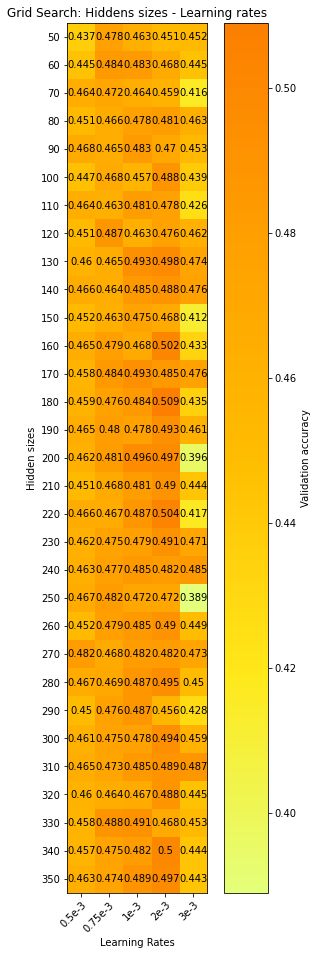

In [28]:
gs_z_gs_hs_lr = np.asarray(gs_hs_lr_val_accs)
fig, ax = plt.subplots(figsize=(6,20))
im = ax.imshow(gs_z_gs_hs_lr, cmap='Wistia')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Validation accuracy", color='black')
cbar.ax.tick_params(color='black')
ax.set_yticks(np.arange(len(gs_hidden_sizes)))
ax.set_xticks(np.arange(len(gs_learning_rates.keys())))
ax.set_yticklabels(gs_hidden_sizes)
ax.set_xticklabels(gs_learning_rates.keys())

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(gs_hidden_sizes)):
    for j in range(len(gs_learning_rates.keys())):
        text = ax.text(j, i, gs_z_gs_hs_lr[i, j],
                       ha="center", va="center", color="black")

#ax.plot(list(learning_rates.keys()), lr_val_accs)
ax.set_ylabel('Hidden sizes', color='black')
ax.set_xlabel('Learning Rates', color='black')
ax.set_title('Grid Search: Hiddens sizes - Learning rates', color='black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.style.use("fast")
params = {"text.color" : "black",
          "xtick.color" : "black",
          "ytick.color" : "black"}
#plt.rcParams.update(params)
plt.draw()
plt.savefig('gs_hs_lr.png')
plt.show()



# Num Iterations

In [30]:
iters = [1000, 2000, 5000, 10000, 15000, 20000]
iter_nets = []
iter_stats = []
iter_val_accs = []
for it in iters:
  net = TwoLayerNet(input_size, 180, num_classes)
  iter_nets.append(net)

  stat = net.train(X_train, y_train, X_val, y_val,
                               num_iters=it, batch_size=200,
                               learning_rate=2e-3, learning_rate_decay=0.95,
                               reg=0.25, verbose=False)
  iter_stats.append(stat)

  val_acc = compute_val_acc(net)
  iter_val_accs.append(val_acc)

Validation accuracy:  0.479
Validation accuracy:  0.524
Validation accuracy:  0.535
Validation accuracy:  0.555
Validation accuracy:  0.565
Validation accuracy:  0.567


In [65]:
fif_net = TwoLayerNet(input_size, 260, num_classes)
fif_stat = fif_net.train(X_train, y_train, X_val, y_val,
                               num_iters=15000, batch_size=200,
                               learning_rate=2e-3, learning_rate_decay=0.95,
                               reg=0.25, verbose=False)
fif_val_acc = compute_val_acc(fif_net)

Validation accuracy:  0.571


In [58]:
twenty_net = TwoLayerNet(input_size, 260, num_classes)
twenty_stat = twenty_net.train(X_train, y_train, X_val, y_val,
                               num_iters=20000, batch_size=200,
                               learning_rate=2e-3, learning_rate_decay=0.95,
                               reg=0.25, verbose=False)
twenty_val_acc = compute_val_acc(twenty_net)

Validation accuracy:  0.565


<Figure size 432x288 with 0 Axes>

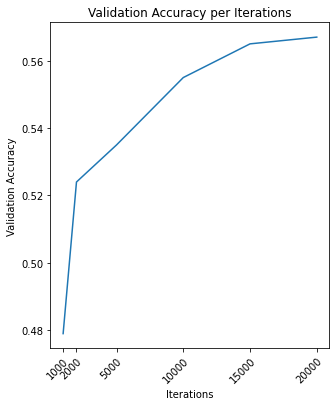

In [31]:
plt.figure(4)

fig, ax = plt.subplots(figsize=(5,6))
ax.plot(iters, iter_val_accs)
ax.set_xlabel('Iterations')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Validation Accuracy per Iterations')
ax.xaxis.set_ticks(iters)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.draw()
plt.savefig('iters.png')
plt.show()